In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
mask_paths = ['/opt/data/private/zsf/VST_railway/RGB_VST/preds/DUTS/RGB_VST/1_cv2diff.png',
            '/opt/data/private/zsf/VST_railway/RGB_VST/preds/DUTS/RGB_VST/2_cv2diff.png',
            '/opt/data/private/zsf/VST_railway/RGB_VST/preds/DUTS/RGB_VST/3_cv2diff.png']


anomaly_img_paths = ['/opt/data/private/zsf/Railway/part3/my_dataset/Real2023_1_v2_crop_scene_classify_SameSize/test/obstacle/box_daylight_wellLight_rain_50m_none_20230706_130542_jpg.rf.998e12b88d66e218ce5f25d59be353f5.jpg.png',
                    '/opt/data/private/zsf/Railway/part3/my_dataset/Real2023_1_v2_crop_scene_classify_SameSize/test/obstacle/box_daylight_wellLight_rain_30m_none_20230705_155825_jpg.rf.4ed40323bc141da11de12f0bb2ecea11.jpg.png',
                    '/opt/data/private/zsf/Railway/part3/my_dataset/Real2023_1_v2_crop_scene_classify_SameSize/test/obstacle/box_daylight_wellLight_sunny_70m_none_6_jpg.rf.1233df895798fb7f0833f83473532a61.jpg.png'
                    ]


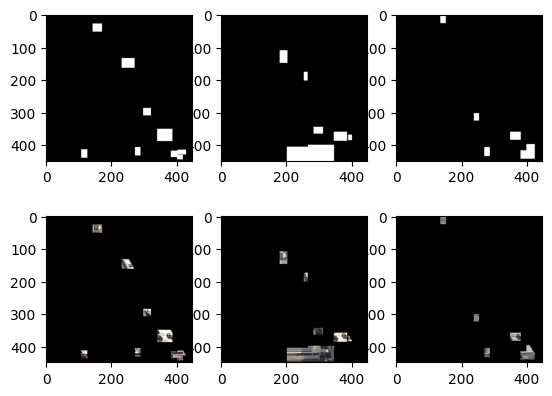

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

i = 1
for mask_path, anomaly_img_path in zip(mask_paths, anomaly_img_paths):
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    _, mask_binary = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 过滤面积小于某个阈值的区域
    area_threshold = 100  # 根据需要调整阈值
    large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > area_threshold]

    # 创建一个新的mask来保存过滤后的区域
    filtered_mask = np.zeros_like(mask_binary)

    for cnt in large_contours:
        # 对每个大区域获取最小外接矩形
        x,y,w,h = cv2.boundingRect(cnt)
        box = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
        # box = np.int0(box)
        # print(box)

        # 在mask上填充矩形
        cv2.drawContours(filtered_mask, [box], 0, (255), cv2.FILLED)

    # Convert mask to 3 channels
    mask_binary_3ch = cv2.cvtColor(filtered_mask, cv2.COLOR_GRAY2BGR)
    plt.subplot(2, len(mask_paths), i)
    plt.imshow(filtered_mask, cmap='gray')
    # plt.show()
    
    img = cv2.imread(anomaly_img_path)
    img = cv2.resize(img, (448, 448))
    
    mask_bool = filtered_mask.astype(bool)  # 转换为布尔类型
    mask_binary_3ch = np.dstack([mask_bool, mask_bool, mask_bool]).astype(np.uint8)  # 转换回整数类型并堆叠为3通道

    img_masked = (mask_binary_3ch) * img
    
    plt.subplot(2, len(mask_paths), i + len(mask_paths))
    plt.imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB))
    # plt.show()
    
    i += 1

plt.show()
